So far we have did these many major improvements: 

**1) Vanilla Architecture**

*   Maxpooling
*   1x1 Kernel
*   Relu activation

**2) Major focus on parameter reduction keeping the accuracy not to dip much**

*   Reduce the no: of layers
<br/><pre>Shift our architecture from deep to shallow. Once image reaches 9*9 resolution, then further layers can't extract any useful feature
       Eg: 3x3 kernel on 9x9 image only covers 25 pixels 9 times.</pre>
*   Reduce no: of kernels 
<br/><pre>Our objective is to detect handwritten digit in 15k max params. Using enough kernels to achieve.</pre>
*   Increase Epoch & Batch size
<br/><pre>Network takes more time to learn as few parameters have to be tuned properly for a broader spectrum. So we have to increase epoch and to utilize gpu cores more, increasing batchsize as well.</pre>

**3) Focused on resolving overfitting**

* BatchNormalization
* Drop-out

***We will focus on learning rate in this iteration for the faster convergence of parameter values***<br/>
**4) Learning rate**
* Cyclic Learning rate

# **Import Libraries and modules**

In [0]:
# Installing Keras Library and importing the same.
# Reference: https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# Numpy is library used for efficient high level mathemtical processing on multi dimensional arrays
import numpy as np

# Keras provides a Sequential model API. This is way of creating a linear stack of layers while creating models.
from keras.models import Sequential

# Flatten provided by Keras will be used to convert a multidimensional tensor into a single 1-D tensor
from keras.layers import Flatten
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization

# Convolution2D will be used to create a convolution kernel that is convolved with the layer input to produce a tensor of outputs
from keras.layers import Convolution2D, MaxPooling2D

# Import np_utils from keras
from keras.utils import np_utils

# Being a subset of NIST, MNIST has datasets of handwritten digits with 60,000 training set and 10,000 test set
from keras.datasets import mnist

# Load pre-shuffled MNIST data into train and test sets

In [0]:
# Loads MINST dataset, 60,000 training set and 10,000 test set
# X values will have images,  y values will have digit represented by the corresponding X images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


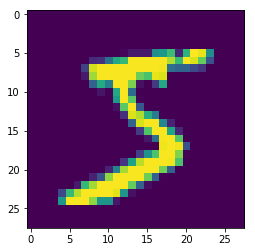

In [0]:
# Let's see a random image in a training dataset (X_train)

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# As you see above dimensions, loaded training dataset has a dimension of 2d. So, we have 60,000 2d images 28x28
# Let's reshapte to 3D as our model requires 3d images. Here, we are reshaping 28x28 to 28x28x1 where 1 being the channel of the image
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Using a 32 bit precision is a common approach in neural network training.
# Reason behind is that to make sure that the dataset fits easily in RAM.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 255 is the max pixel value in an image. Dividing all pixel values by 255 ensures that the input features are scaled between 0.0 and 1.0
# Reason behind to scale between 0.0 and 1.0 is to make sure default learning rate works well.
X_train /= 255
X_test /= 255

In [0]:
# Let's see corresponding y_train value
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# Reason behind this conversion is, at the end of the model we will be having 10 nodes which will tell, out of 0-9 digits which does the input image represent.
# Hence to learn as well as to evaluate, we need a 10 length array for each output label
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# Let's see what are the initial 10 values in y_train. Values is y_train corresponds to the digit represnted by x dataset images.
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Model Architecture

In [0]:
# Initializing Sequential API as we will be creating model in a linear stack way
model = Sequential()



# Input Dimension  = 28x28x1
# Kernel           = 3x3x1
# No:of Kernels    = 16
# Output Dimension = 26x26x16 (Here,16 is the number of channels)
# Receptive Field  = 3x3  
model.add(Convolution2D(13, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Input Dimension  = 26x26x16
# Kernel           = 3x3x16
# No:of Kernels    = 16
# Output Dimension = 24x24x16 (Here,16 is the number of channels)
# Receptive Field  = 5x5 
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Input Dimension  = 24x24x16
# Kernel           = 3x3x16
# No:of Kernels    = 32
# Output Dimension = 22x22x32 (Here,32 is the number of channels)
# Receptive Field  = 7x7 
model.add(Convolution2D(19, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(13, 1, activation='relu'))
# Input Dimension  = 22x22x16
# Maxpooling Dimension = 2x2 (Default is 2x2)
# Output Dimension = 11x11x16 (Here,16 is the number of channels)
# Receptive Field  = 14x14 
# NOTE: Maxpooling halves the resolution and doubles the receptive field
model.add(MaxPooling2D())



# Input Dimension  = 11x11x16
# Kernel           = 3x3x16
# No:of Kernels    = 16
# Output Dimension = 9x9x16 (Here,32 is the number of channels)
# Receptive Field  = 16x16 
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))





# # Input Dimension  = 7x7x32
# # Kernel           = 1x1x32
# # No:of Kernels    = 10
# # Output Dimension = 7x7x10 (Here,10 is the number of channels)
# # Receptive Field  = 18x18
# # NOTE: 1x1 Kernels are used here for dimension(channel) reduction.
# # No effect on output resolution or receptive field
model.add(Convolution2D(19, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))




# Input Dimension  = 7x7x10
# Kernel           = 7x7x10
# No:of Kernels    = 10
# Output Dimension = 1x1x10 (Here,32 is the number of channels)
# Receptive Field  = 20x20 
model.add(Convolution2D(10, 1))
model.add(Convolution2D(10, 7))

# Input Dimension  = 1x1x10
# Output Dimension = 10
model.add(Flatten())

# We use a “softmax” activation function in the output layer. 
# This is to ensure the output values are in the range of 0 and 1 and used as predicted probabilities.
model.add(Activation('softmax'))







Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(13, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  # Remove the CWD from sys.path while we load stuff.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(19, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(19, (3, 3), activation="relu")`


In [0]:
# Let's see the overview of stacked up layers in the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 13)        130       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 13)        52        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 13)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1888      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 19)        2755      
__________

# Cyclic Learning Rate

In [0]:
from keras.callbacks import *

class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency, as detailed in this paper (https://arxiv.org/abs/1506.01186).
    The amplitude of the cycle can be scaled on a per-iteration or 
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each 
        cycle iteration.
    For more detail, please see paper.
    
    # Example
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    
    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```    
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore 
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where 
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored 
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on 
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    """

    def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000., mode='triangular',
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1/(2.**(x-1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma**(x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())        
            
    def on_batch_end(self, epoch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())

# Model Training & Prediction

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

**Initial 10 Epochs**

In [0]:
# Introducing learning rate
from keras.callbacks import *
clr_triangular = CyclicLR(mode='triangular')

model.fit(X_train, Y_train, batch_size=168, nb_epoch=10, verbose=1, callbacks=[clr_triangular], validation_data=(X_test,Y_test))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.3297 - acc: 0.8939 - val_loss: 0.1034 - val_acc: 0.9679
Epoch 2/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0711 - acc: 0.9778 - val_loss: 0.0562 - val_acc: 0.9800
Epoch 3/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0559 - acc: 0.9828 - val_loss: 0.0516 - val_acc: 0.9826
Epoch 4/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0521 - acc: 0.9836 - val_loss: 0.0423 - val_acc: 0.9861
Epoch 5/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0441 - acc: 0.9856 - val_loss: 0.0830 - val_acc: 0.9765
Epoch 6/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0444 - acc: 0.9863 - val_loss: 0.0582 - val_acc: 0.9819
Epoch 7/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0360 - acc: 0.9887 - val_loss: 0.0334 - val_ac

In [0]:
from keras.callbacks import *
clr_triangular = CyclicLR(mode='triangular')

model.fit(X_train, Y_train, batch_size=168, nb_epoch=10, verbose=1, callbacks=[clr_triangular], validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 1176/60000 [..............................] - ETA: 7s - loss: 0.0092 - acc: 0.9974

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


60000/60000 [==============================] - 6s 97us/step - loss: 0.0170 - acc: 0.9945 - val_loss: 0.0217 - val_acc: 0.9928
Epoch 2/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0190 - acc: 0.9939 - val_loss: 0.0403 - val_acc: 0.9878
Epoch 3/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0274 - acc: 0.9912 - val_loss: 0.0345 - val_acc: 0.9902
Epoch 4/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0312 - acc: 0.9898 - val_loss: 0.0277 - val_acc: 0.9914
Epoch 5/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0299 - acc: 0.9905 - val_loss: 0.0351 - val_acc: 0.9895
Epoch 6/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0313 - acc: 0.9901 - val_loss: 0.0286 - val_acc: 0.9899
Epoch 7/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0261 - acc: 0.9917 - val_loss: 0.0259 - val_acc: 0.9914
Epoch 8/10
60000/60000 [===========================

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.020743367772135025, 0.994]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[4.7804848e-13 1.9645589e-12 2.3841048e-08 7.8087214e-10 3.6489740e-13
  3.3829469e-13 6.8975555e-16 1.0000000e+00 2.3342623e-12 2.5043780e-09]
 [4.6424926e-08 3.9645783e-11 1.0000000e+00 4.8504642e-12 9.9067152e-15
  6.1663697e-16 2.0883755e-09 8.0167984e-15 9.2652677e-11 7.4162462e-16]
 [2.5436302e-08 9.9999881e-01 8.9561700e-09 3.5479932e-09 3.3484420e-07
  3.9309597e-08 2.6645540e-07 2.4985641e-07 1.6973659e-07 1.8200512e-07]
 [9.9999332e-01 1.0864665e-11 2.1010147e-09 6.3500016e-10 1.8066154e-10
  9.9201569e-10 6.2696995e-06 3.4571308e-12 1.0469694e-07 2.5672691e-07]
 [2.9526115e-09 1.0907454e-09 4.3242196e-10 1.5863699e-11 9.9999392e-01
  2.1526581e-09 2.6664603e-07 3.6582275e-09 1.6549860e-09 5.8669184e-06]
 [7.5909199e-08 9.9999642e-01 7.6194667e-08 2.9134520e-10 8.3739394e-07
  2.1078326e-09 3.3625120e-08 1.3577425e-06 3.4770732e-08 1.0142184e-06]
 [1.0516537e-12 1.7155068e-10 1.5284014e-10 8.0571698e-14 9.9997211e-01
  5.1333321e-10 3.3041517e-11 4.9147610e-09 7.9576051e-07 